# Perform Exploratory Data Analysis

### Preliminary Stuff

In [53]:
# Imports
import pandas as pd
import seaborn as sns

In [54]:
# Grab the data
df = pd.read_csv('stats_cleaned.csv')

print(df.head())

   Unnamed: 0 last_name, first_name  year  home_run  k_percent  p_earned_run  \
0           0        Colon, Bartolo  2015        25       16.7            90   
1           1         Burnett, A.J.  2015        11       20.5            58   
2           2           Hudson, Tim  2015        13       12.2            61   
3           3         Buehrle, Mark  2015        22       11.0            84   
4           4          Sabathia, CC  2015        28       18.9            88   

   p_run  p_win  p_loss  p_era  barrel_batted_rate  hard_hit_percent  \
0     94     14      13   4.16                 5.4              34.7   
1     64      9       7   3.18                 4.8              38.7   
2     62      8       9   4.44                 4.8              34.1   
3    100     15       8   3.81                 4.9              33.0   
4     92      6      10   4.73                 4.1              31.1   

   win_loss_pct  lack_of_run_support  
0      1.076923                False  
1      1

### Beginning Observations

In [55]:
# Shape of the data frame
df.shape

(999, 14)

In [56]:
# What columns are we working with
df.columns

Index(['Unnamed: 0', 'last_name, first_name', 'year', 'home_run', 'k_percent',
       'p_earned_run', 'p_run', 'p_win', 'p_loss', 'p_era',
       'barrel_batted_rate', 'hard_hit_percent', 'win_loss_pct',
       'lack_of_run_support'],
      dtype='object')

In [57]:
# Summarize the numerical data
df.describe()

,Unnamed: 0,year,home_run,k_percent,p_earned_run,p_run,p_win,p_loss,p_era,barrel_batted_rate,hard_hit_percent,win_loss_pct
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,499.000000,2018.795796,19.870871,22.128428,67.569570,72.685686,9.523524,8.451451,4.055636,6.859960,36.182683,1.365542
std,288.530761,2.582961,7.223344,5.022292,20.338196,21.762226,4.109864,3.330101,0.953701,1.864186,4.420669,0.984821
min,0.000000,2015.000000,2.000000,10.400000,14.000000,14.000000,1.000000,0.000000,1.630000,2.000000,23.800000,0.076923
25%,249.500000,2017.000000,15.000000,18.700000,57.000000,61.000000,7.000000,6.000000,3.380000,5.500000,33.100000,0.750000
50%,499.000000,2019.000000,20.000000,21.400000,70.000000,75.000000,9.000000,8.000000,3.990000,6.700000,36.000000,1.100000
75%,748.500000,2021.000000,25.000000,25.100000,81.000000,87.000000,12.000000,11.000000,4.670000,8.000000,39.200000,1.683333
max,998.000000,2023.000000,44.000000,41.100000,124.000000,130.000000,22.000000,19.000000,7.020000,14.900000,48.700000,8.000000


In [58]:
# Histograms for all numeric columns
df_numeric = df.drop(columns=['last_name, first_name', 'Unnamed: 0'])

print(df_numeric)

     year  home_run  k_percent  p_earned_run  p_run  p_win  p_loss  p_era  \
0    2015        25       16.7            90     94     14      13   4.16   
1    2015        11       20.5            58     64      9       7   3.18   
2    2015        13       12.2            61     62      8       9   4.44   
3    2015        22       11.0            84    100     15       8   3.81   
4    2015        28       18.9            88     92      6      10   4.73   
..    ...       ...        ...           ...    ...    ...     ...    ...   
994  2023        14       25.0            53     54     12       7   2.83   
995  2023        18       22.2            63     64      8       7   4.32   
996  2023        24       20.7            84     93      4       9   5.36   
997  2023        26       26.8            88     94     11      13   5.09   
998  2023        19       17.5            74     79     12       4   3.81   

     barrel_batted_rate  hard_hit_percent  win_loss_pct  lack_of_run_suppor

### Potential Cleaning

In [59]:
# Are there any null values?
df.isnull().sum()

Unnamed: 0               0
last_name, first_name    0
year                     0
home_run                 0
k_percent                0
p_earned_run             0
p_run                    0
p_win                    0
p_loss                   0
p_era                    0
barrel_batted_rate       0
hard_hit_percent         0
win_loss_pct             0
lack_of_run_support      0
dtype: int64

<Axes: >

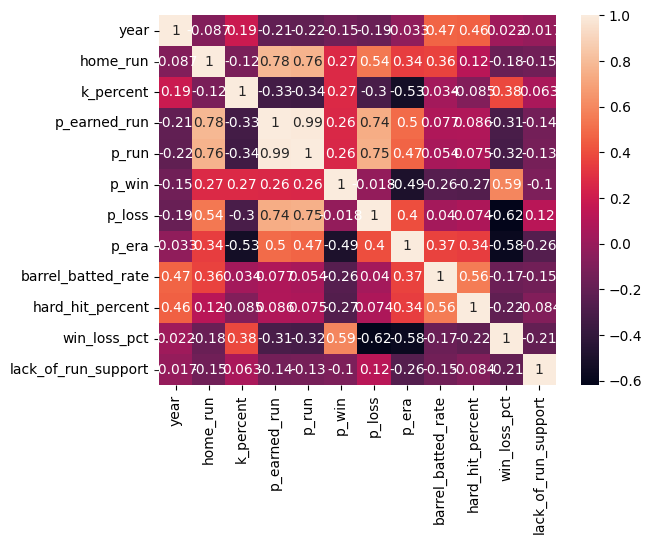

In [60]:
# Correlation matrix
#-> Assign the correlation to a variable
correlation = df_numeric.corr()

#-> Use Seaborn to create a heat map of all the correlations
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

<Axes: >

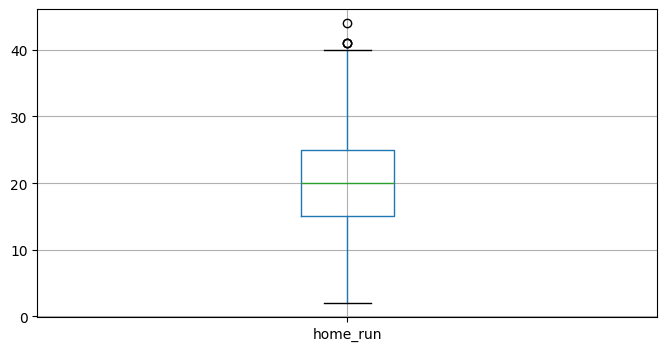

In [61]:
# Boxplots of each to detect outliers
df.boxplot(column='home_run', figsize=(8,4))

<Axes: >

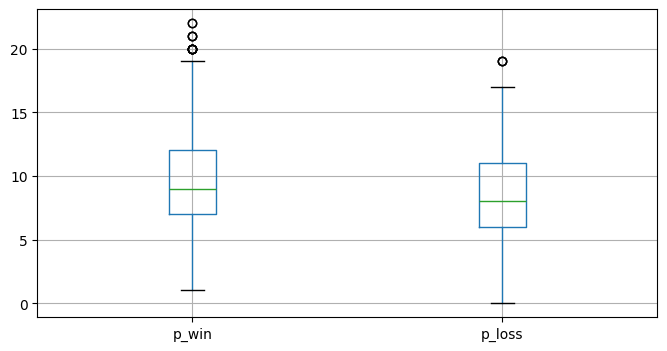

In [62]:
df.boxplot(column=['p_win', 'p_loss'], figsize=(8,4))

<Axes: >

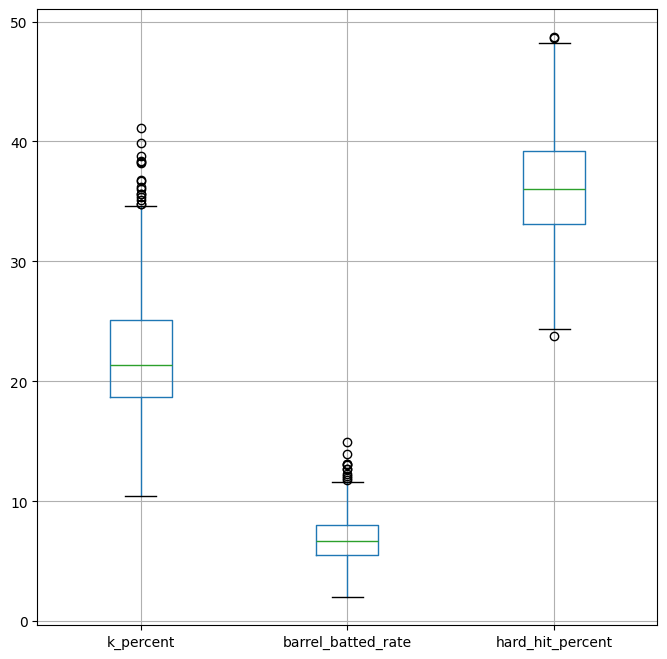

In [63]:
df.boxplot(column=['k_percent', 'barrel_batted_rate', 'hard_hit_percent'], figsize=(8,8))

<Axes: >

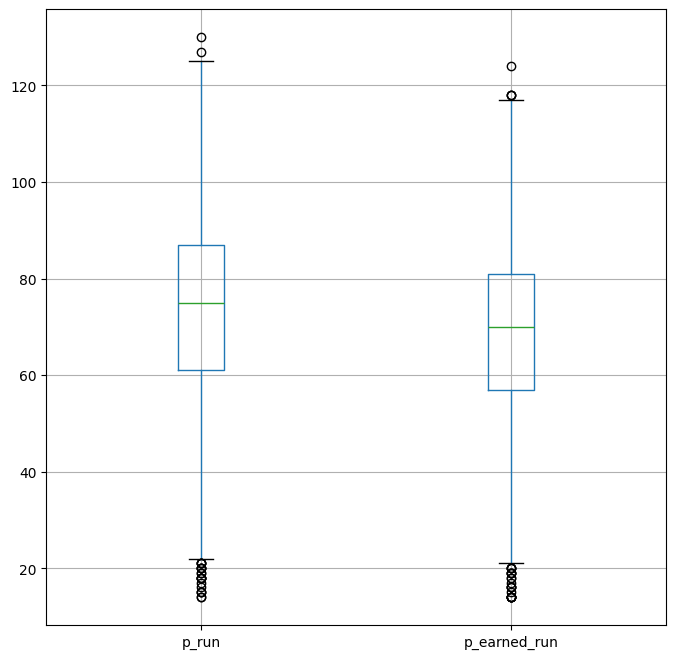

In [64]:
df.boxplot(column=['p_run', 'p_earned_run'], figsize=(8,8))

<Axes: >

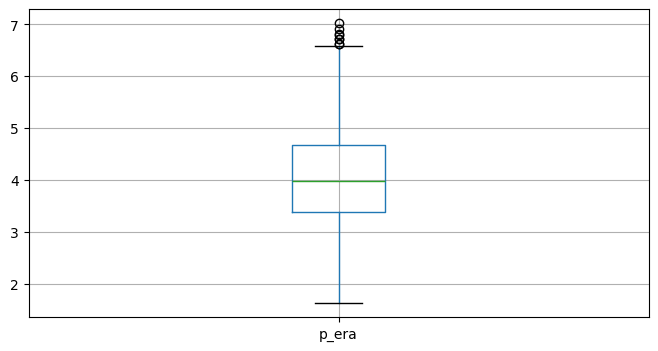

In [65]:
df.boxplot(column='p_era', figsize=(8,4))

<Axes: >

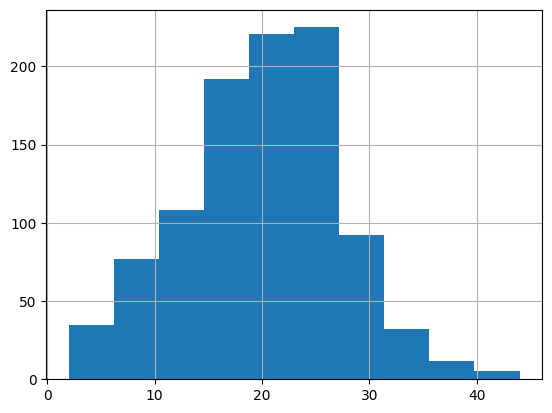

In [66]:
df.home_run.hist()

<Axes: >

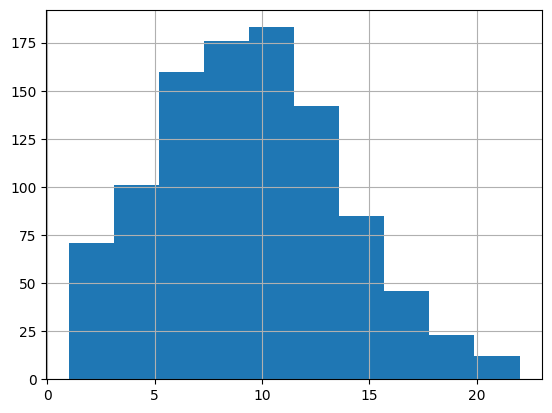

In [67]:
df.p_win.hist()

<Axes: >

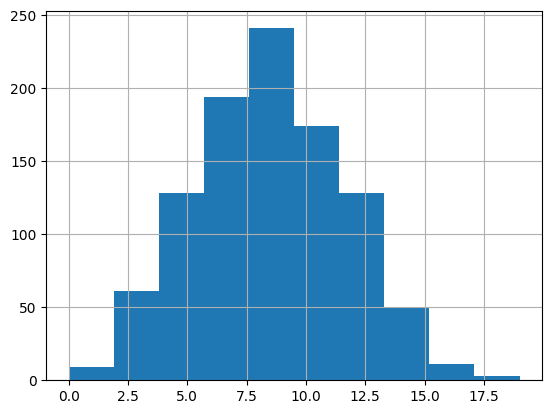

In [68]:
df.p_loss.hist()

<Axes: >

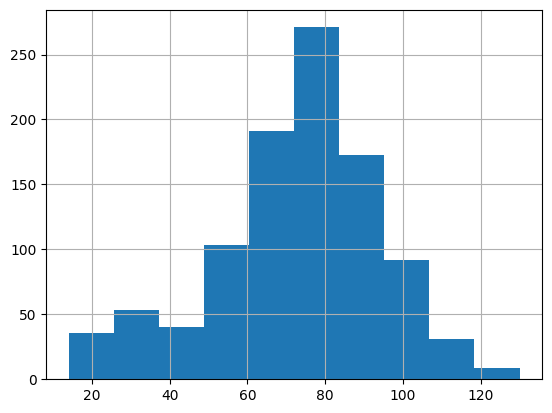

In [69]:
df.p_run.hist()

<Axes: >

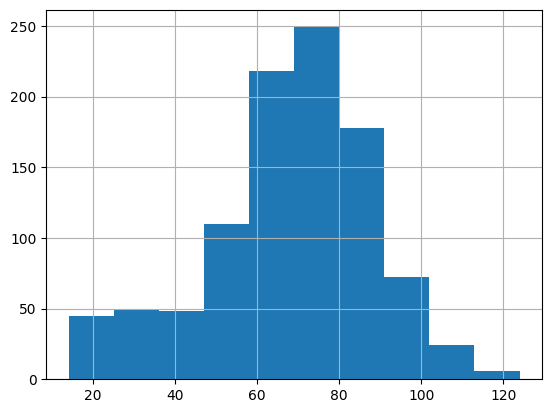

In [70]:
df.p_earned_run.hist()

In [71]:
df.columns

Index(['Unnamed: 0', 'last_name, first_name', 'year', 'home_run', 'k_percent',
       'p_earned_run', 'p_run', 'p_win', 'p_loss', 'p_era',
       'barrel_batted_rate', 'hard_hit_percent', 'win_loss_pct',
       'lack_of_run_support'],
      dtype='object')

<Axes: >

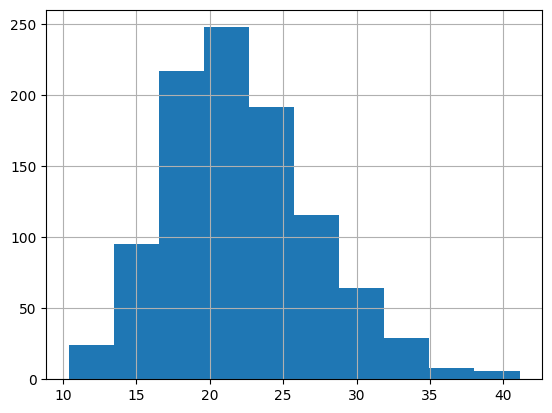

In [72]:
df.k_percent.hist()

<Axes: >

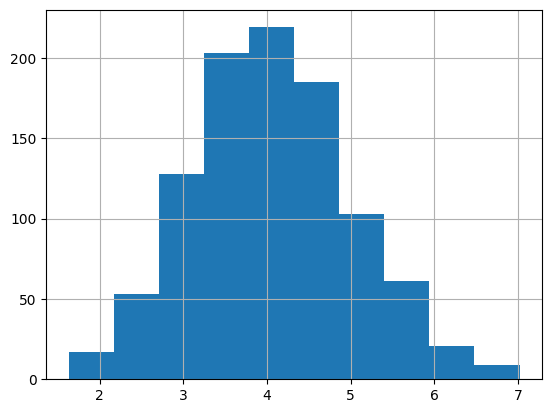

In [73]:
df.p_era.hist()

<Axes: >

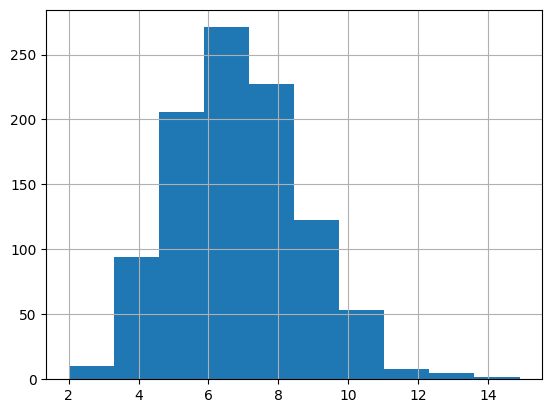

In [74]:
df.barrel_batted_rate.hist()

<Axes: >

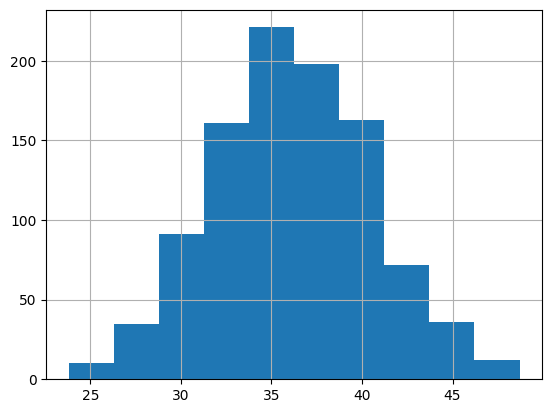

In [75]:
df.hard_hit_percent.hist()

<Axes: >

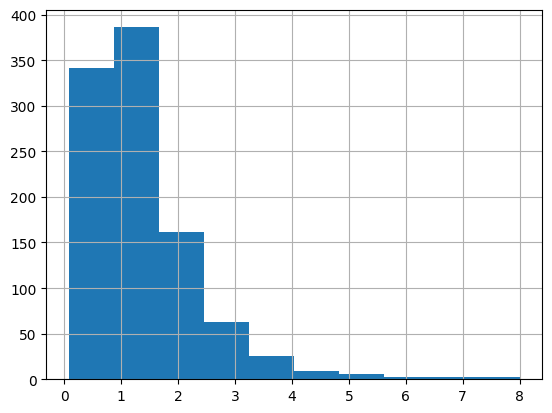

In [76]:
df.win_loss_pct.hist()

### Deeper Analysis

In [77]:
pd.pivot_table(df, index='lack_of_run_support', aggfunc='count', values='p_win')

,p_win
lack_of_run_support,
False,790
True,209


In [78]:
pd.pivot_table(df, index='lack_of_run_support', aggfunc='median', values=['home_run',
                                                                            'k_percent',
                                                                            'p_earned_run', 'p_era', 'p_run', 
                                                                            'p_win', 'p_loss', 'win_loss_pct',
                                                                            'barrel_batted_rate', 'hard_hit_percent'])
# Only numbers higher for TRUE is k_percent and p_loss
# ERA is better for TRUE significantly

,barrel_batted_rate,hard_hit_percent,home_run,k_percent,p_earned_run,p_era,p_loss,p_run,p_win,win_loss_pct
lack_of_run_support,,,,,,,,,,
False,6.85,36.3,20.0,21.2,71.0,4.28,8.0,76.0,10.0,1.25
True,6.30,35.3,18.0,22.2,65.0,3.65,9.0,71.0,9.0,1.00


In [79]:
pd.pivot_table(df, index='lack_of_run_support', values=['p_run', 'p_earned_run'])
# FALSE: 74.108861 - 69.078481 = 5.03038
# TRUE: 67.306220 - 61.866029 = 5.440191
#-> TRUE lets up more unearned runs than FALSE

,p_earned_run,p_run
lack_of_run_support,,
False,69.078481,74.108861
True,61.866029,67.306220


### Additional Cleaning

In [80]:
# Remove outliers
#-> Outliers in this data set are a natural part of the 'population' being studied
#-> Thus they shouldn't be removed

# Remove unwanted columns
#-> ERA and win-loss percent were used to create lack column
#-> Should probably remove these since they will have a really strong impact on the contributions

# Normalize the data?
#-> The only non-normal column is win-loss-pct
#-> This was used to create lack column
#-> As mentioned above, we should probably get rid of columns that contributed to lack

# Check for strong correlations to deal with

# Create column for total of unearned runs as this has a positive correlation with lack

In [81]:
# Create Column For Unearned Runs
df['p_unearned_run'] = df.p_run - df.p_earned_run

print('Total\tEarned\tUnearned')
for i in range(10):
    print(df.p_run[i],'\t',df.p_earned_run[i],'\t',df.p_unearned_run[i])

Total	Earned	Unearned
94 	 90 	 4
64 	 58 	 6
62 	 61 	 1
100 	 84 	 16
92 	 88 	 4
76 	 70 	 6
97 	 93 	 4
99 	 99 	 0
71 	 67 	 4
73 	 69 	 4


<Axes: >

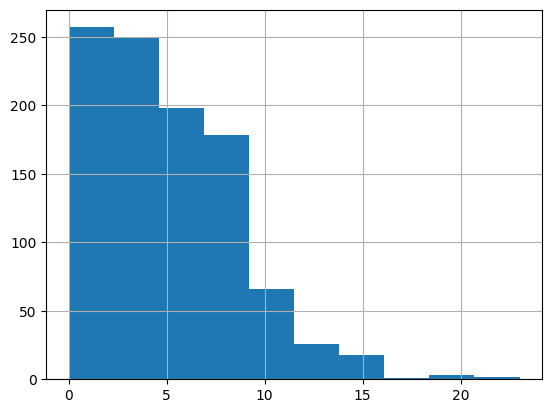

In [82]:
# Check if unearned runs are normally distributed
df.p_unearned_run.hist()

In [90]:
# Normalize unearned runs column
#-> Using Feature Scaling
#-> https://www.geeksforgeeks.org/normalize-a-column-in-pandas/#
df.p_unearned_run = (df.p_unearned_run - df.p_unearned_run.min()) / (df.p_unearned_run.max() - df.p_unearned_run.min())

Drop Unwanted Columns

In [84]:
# Remove variables that contributed with the creation of lack_of_run_support variable
df = df.drop(columns=['win_loss_pct', 'p_era'])

In [85]:
# Drop columns that have an end result (wins, losses)
df = df.drop(columns=['p_win', 'p_loss'])

In [86]:
# Drop the 'unnamed' column
df = df.drop(columns='Unnamed: 0')

<Axes: >

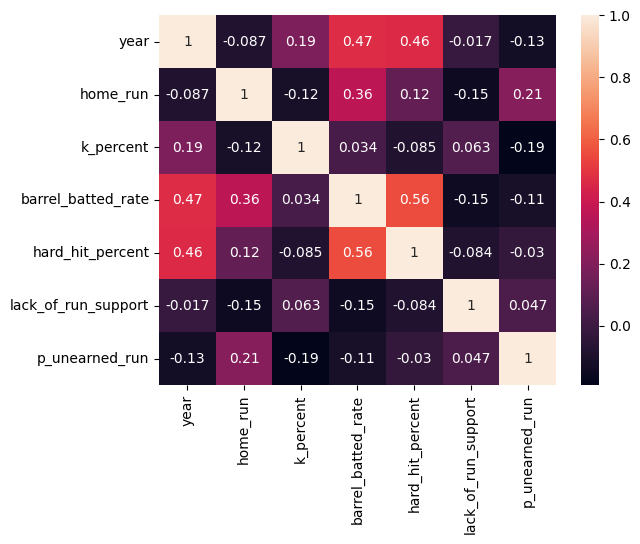

In [91]:
# Re-issue the correlation matrix
#-> Create data frame of only numeric columns
df_numeric = df.drop(columns=['last_name, first_name'])

#-> Re-calculate the correlations
correlation = df_numeric.corr()

#-> Re-plot the correlation matrix
sns.heatmap(correlation, annot=True)

* p_earned_run & p_run -> 0.99
  * At least one needs to go
* p_earned_run & lack_of_run_support -> -0.14
* p_run & lack_of_run_support -> -0.13
  * REMOVE p_run
* home_run & p_earned_run -> 0.78
* home_run & lack_of_run_support -> -0.15
* p_earned_run & lack_of_run_support -> -0.14
  * REMOVE p_earned_run


In [89]:
# Drop some columns if there is a strong correlation between them
#-> "Strong" correlation is considered to be < 0.75
#-> https://www.statology.org/what-is-a-strong-correlation/

df = df.drop(columns=['p_earned_run', 'p_run'])

  last_name, first_name  year  home_run  k_percent  barrel_batted_rate  \
0        Colon, Bartolo  2015        25       16.7                 5.4   
1         Burnett, A.J.  2015        11       20.5                 4.8   
2           Hudson, Tim  2015        13       12.2                 4.8   
3         Buehrle, Mark  2015        22       11.0                 4.9   
4          Sabathia, CC  2015        28       18.9                 4.1   

   hard_hit_percent  lack_of_run_support  p_unearned_run  
0              34.7                False               4  
1              38.7                 True               6  
2              34.1                False               1  
3              33.0                False              16  
4              31.1                False               4  


In [97]:
# Sort the columns by player
df = df.sort_values(['last_name, first_name', 'year'], ascending=True)

In [98]:
print(df.head())

    last_name, first_name  year  home_run  k_percent  barrel_batted_rate  \
308          Adleman, Tim  2017        29       20.3                 7.9   
586      Alcantara, Sandy  2019        23       18.0                 6.5   
774      Alcantara, Sandy  2021        21       24.0                 6.1   
863      Alcantara, Sandy  2022        16       23.4                 5.3   
952      Alcantara, Sandy  2023        22       19.8                 7.0   

     hard_hit_percent  lack_of_run_support  p_unearned_run  
308              32.7                False        0.173913  
586              34.3                 True        0.391304  
774              39.4                 True        0.521739  
863              38.5                False        0.391304  
952              40.6                False        0.260870  


### Exporting New Data Frame

In [99]:
# Make sure to set index to False to avoid unwanted columns
df.to_csv('stats_EDA.csv')